In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("coin_data2.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id_x                                        10 non-null     object 
 1   symbol_x                                    10 non-null     object 
 2   name_x                                      10 non-null     object 
 3   coin_id                                     10 non-null     object 
 4   adoption                                    10 non-null     float64
 5   Max Supply                                  5 non-null      float64
 6   Rank                                        10 non-null     int64  
 7   market_cap_x                                10 non-null     float64
 8   volume                                      10 non-null     float64
 9   id                                          10 non-null     object 
 10  image            

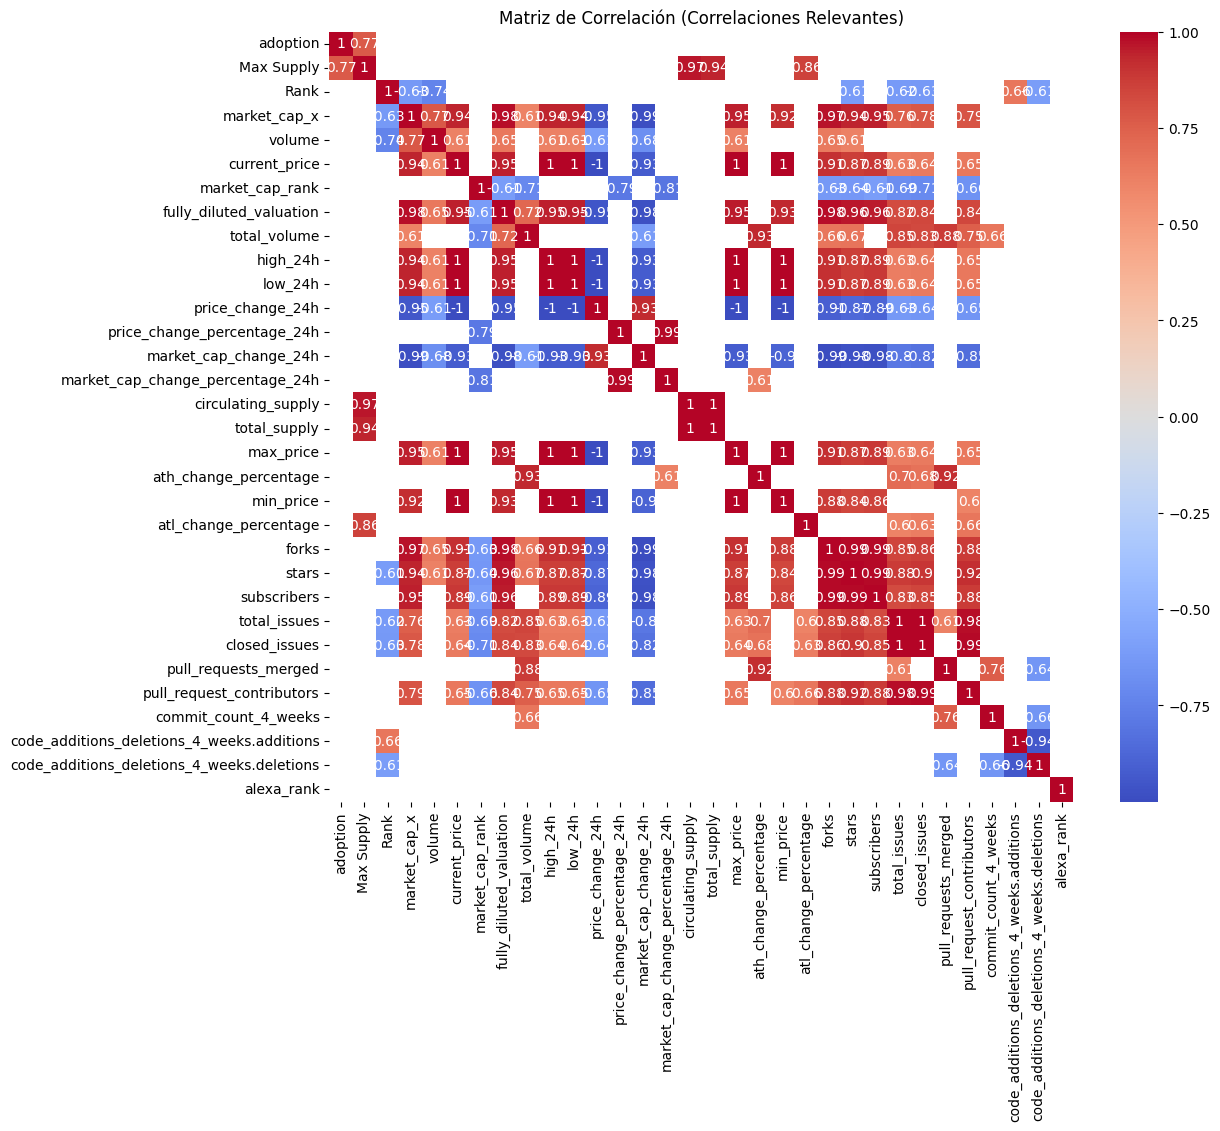

In [18]:
# Filtrar las columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Definir umbral de correlación
threshold = 0.6

# Encontrar las correlaciones relevantes
correlations_above_threshold = correlation_matrix.abs() > threshold

# Generar un mapa de calor (heatmap) de las correlaciones relevantes
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[correlations_above_threshold], annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (Correlaciones Relevantes)')
plt.show()

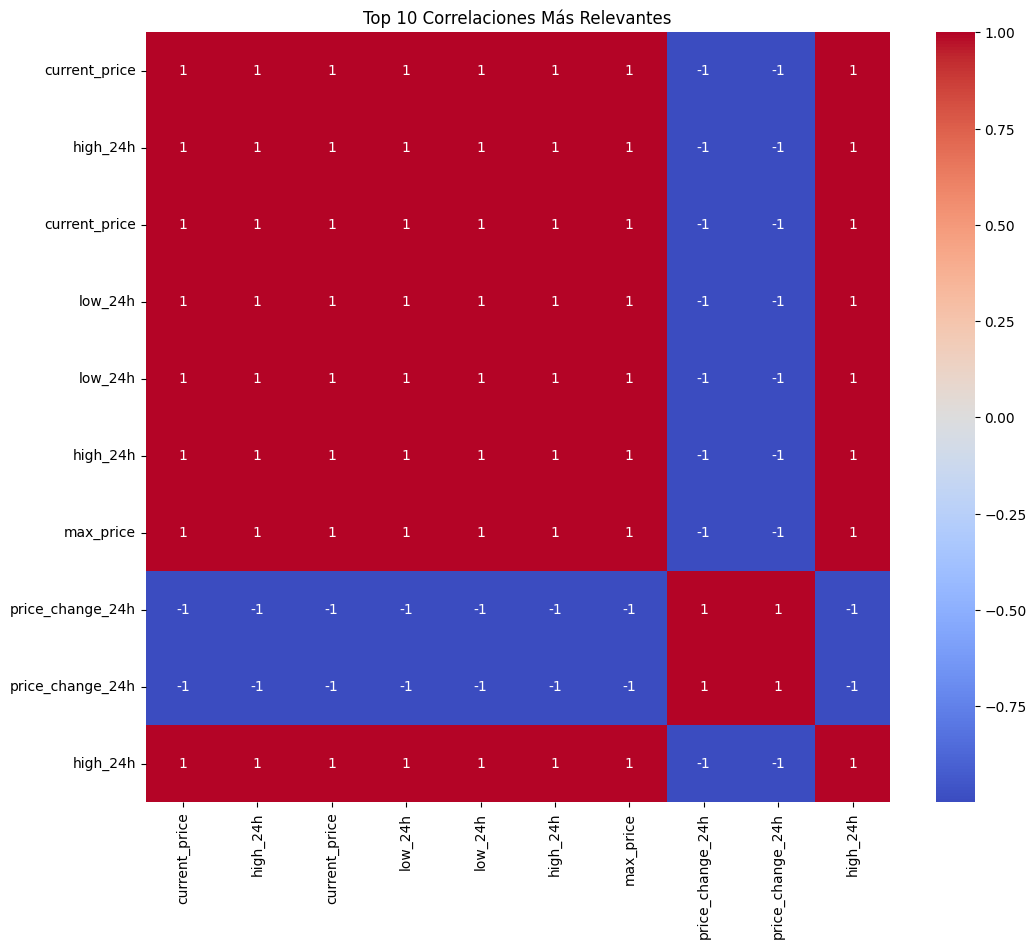

In [25]:
# Filtrar las columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Definir umbral de correlación
threshold = 0.55

# Filtrar las correlaciones relevantes
relevant_correlations = correlation_matrix[
    (correlation_matrix > threshold) | (correlation_matrix < -threshold)
]

# Obtener las 10 correlaciones más relevantes
flattened_correlations = relevant_correlations.unstack()
flattened_correlations = flattened_correlations[flattened_correlations != 1]
top_relevant_correlations = flattened_correlations.abs().sort_values(ascending=False).head(10)
top_relevant_correlations = top_relevant_correlations.index.get_level_values(0)

# Filtrar la matriz de correlación para incluir solo las 10 correlaciones más relevantes
top_relevant_correlation_matrix = correlation_matrix.loc[top_relevant_correlations, top_relevant_correlations]

# Crear un mapa de calor (heatmap) de las 10 correlaciones más relevantes
plt.figure(figsize=(12, 10))
sns.heatmap(top_relevant_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Top 10 Correlaciones Más Relevantes')
plt.show()

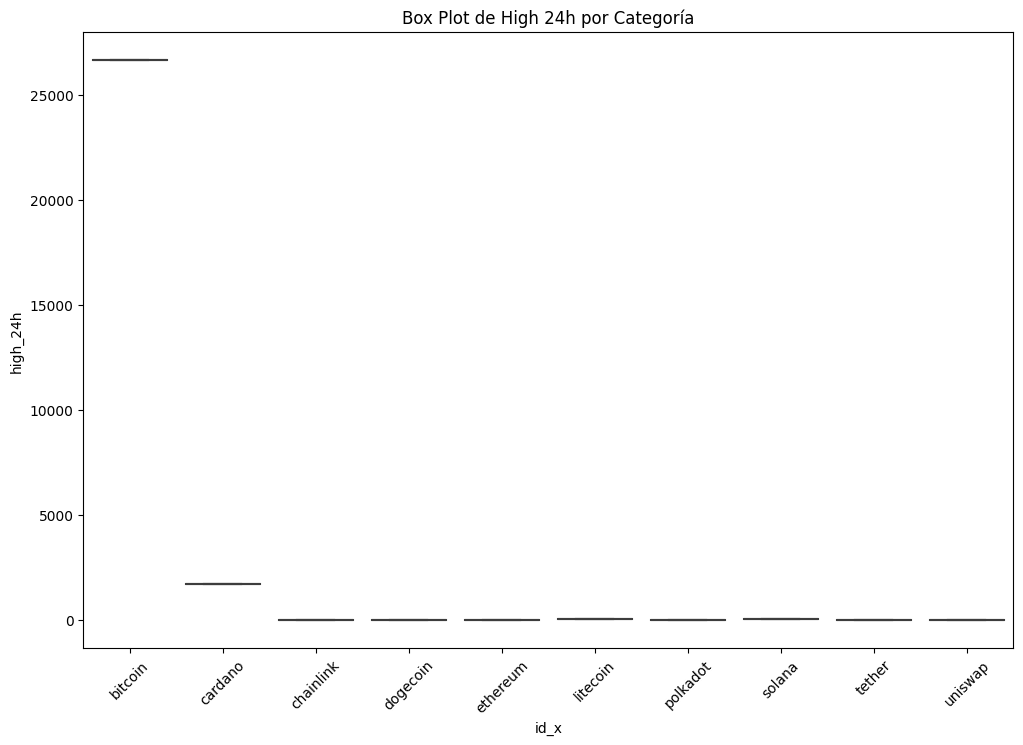

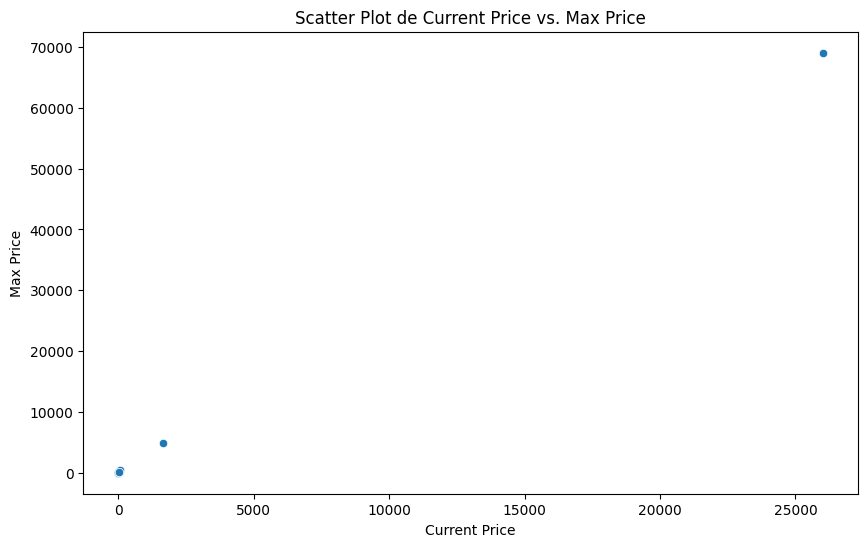

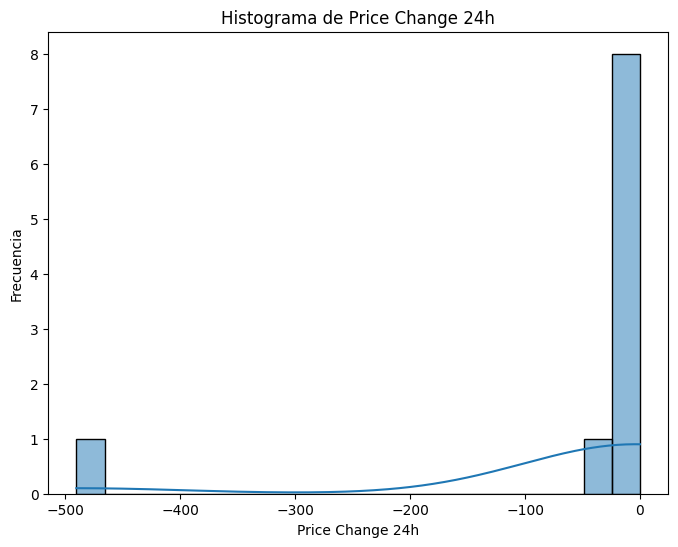

/var/folders/x4/20fwy7dn5n13ppx5q_fz5m280000gn/T/ipykernel_55512/2462921262.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='id_x', y='total_issues', data=data, ci=None)


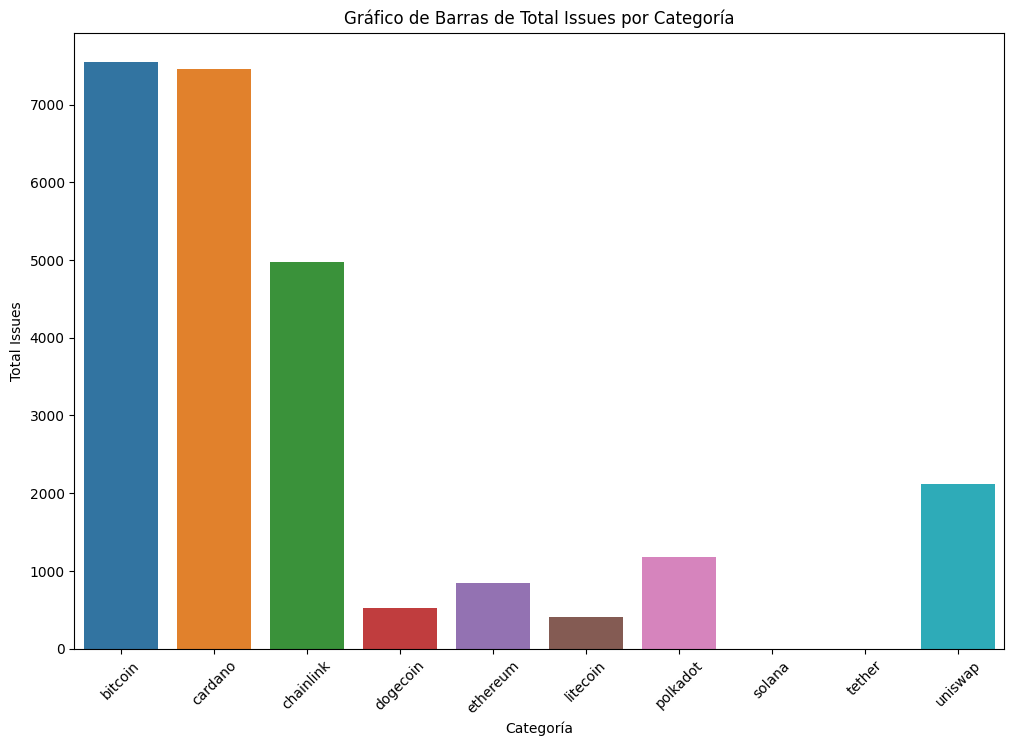

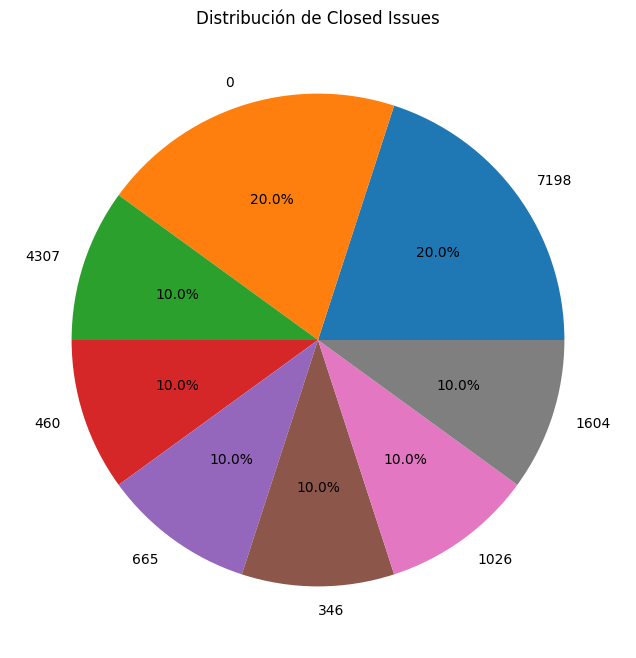

In [48]:
# Box Plot de High 24h por Categoría
plt.figure(figsize=(12, 8))  # Crear una figura de tamaño 12x8 pulgadas
sns.boxplot(x='id_x', y='high_24h', data=data)  # Crear un gráfico de caja (box plot) de high_24h por categoría
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x en 45 grados
plt.title('Box Plot de High 24h por Categoría')  # Establecer título del gráfico
plt.show()  # Mostrar el gráfico

# Scatter Plot de Current Price vs. Max Price
plt.figure(figsize=(10, 6))  # Crear una figura de tamaño 10x6 pulgadas
sns.scatterplot(x='current_price', y='max_price', data=data)  # Crear un gráfico de dispersión de current_price vs. max_price
plt.title('Scatter Plot de Current Price vs. Max Price')  # Establecer título del gráfico
plt.xlabel('Current Price')  # Etiqueta del eje x
plt.ylabel('Max Price')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

# Histograma de Price Change 24h
plt.figure(figsize=(8, 6))  # Crear una figura de tamaño 8x6 pulgadas
sns.histplot(data=data, x='price_change_24h', bins=20, kde=True)  # Crear un histograma de price_change_24h con 20 bins y estimación de densidad
plt.title('Histograma de Price Change 24h')  # Establecer título del gráfico
plt.xlabel('Price Change 24h')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

# Gráfico de Barras de Total Issues por Categoría
plt.figure(figsize=(12, 8))  # Crear una figura de tamaño 12x8 pulgadas
sns.barplot(x='id_x', y='total_issues', data=data, ci=None)  # Crear un gráfico de barras de total_issues por categoría sin intervalo de confianza
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x en 45 grados
plt.title('Gráfico de Barras de Total Issues por Categoría')  # Establecer título del gráfico
plt.xlabel('Categoría')  # Etiqueta del eje x
plt.ylabel('Total Issues')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

# Gráfico de Pastel de Distribución de Closed Issues
plt.figure(figsize=(8, 8))  # Crear una figura de tamaño 8x8 pulgadas
data['closed_issues'].value_counts().plot.pie(autopct='%1.1f%%')  # Crear un gráfico de pastel de la distribución de closed_issues con porcentajes
plt.title('Distribución de Closed Issues')  # Establecer título del gráfico
plt.ylabel('')  # Eliminar etiqueta del eje y
plt.show()  # Mostrar el gráfico

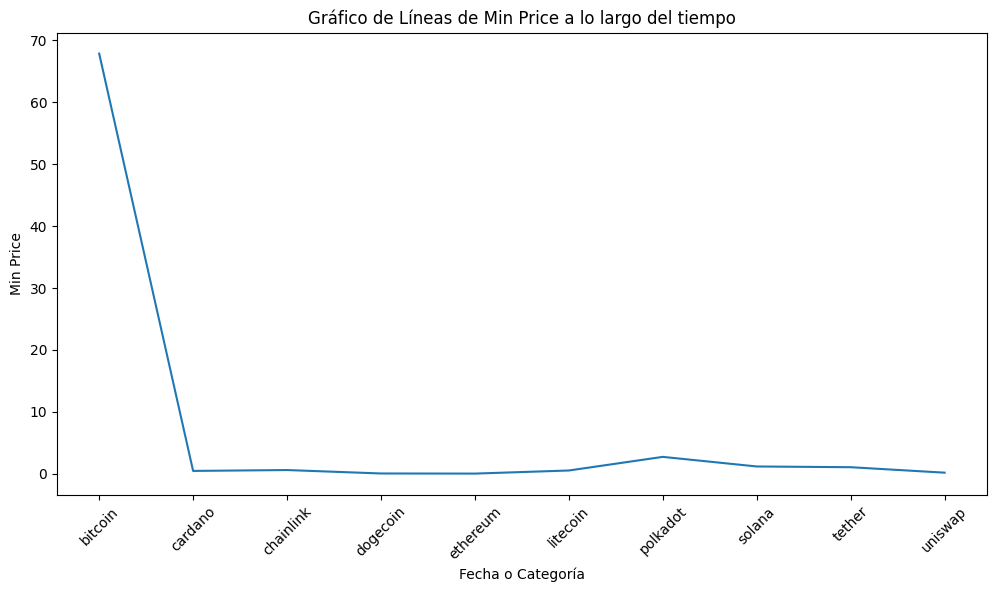

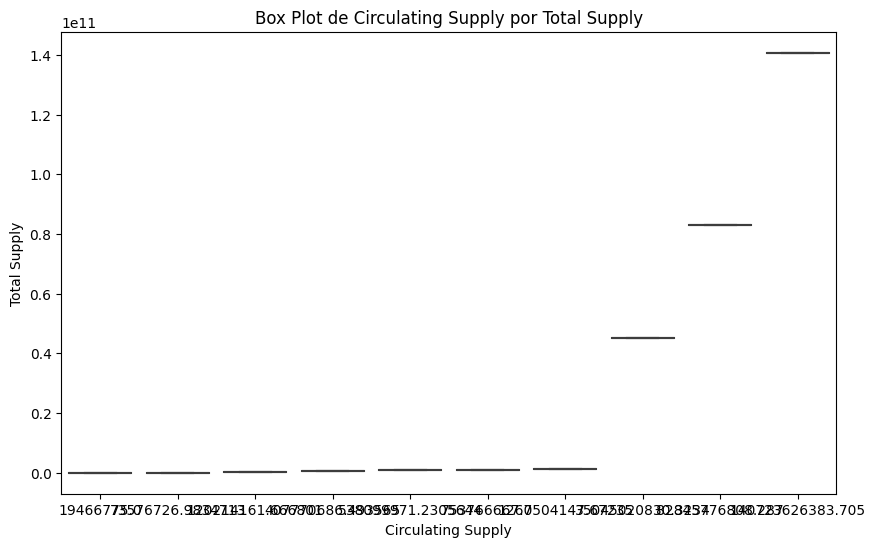

/var/folders/x4/20fwy7dn5n13ppx5q_fz5m280000gn/T/ipykernel_55512/4037070877.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='id_x', y='total_supply', data=data, ci=None)


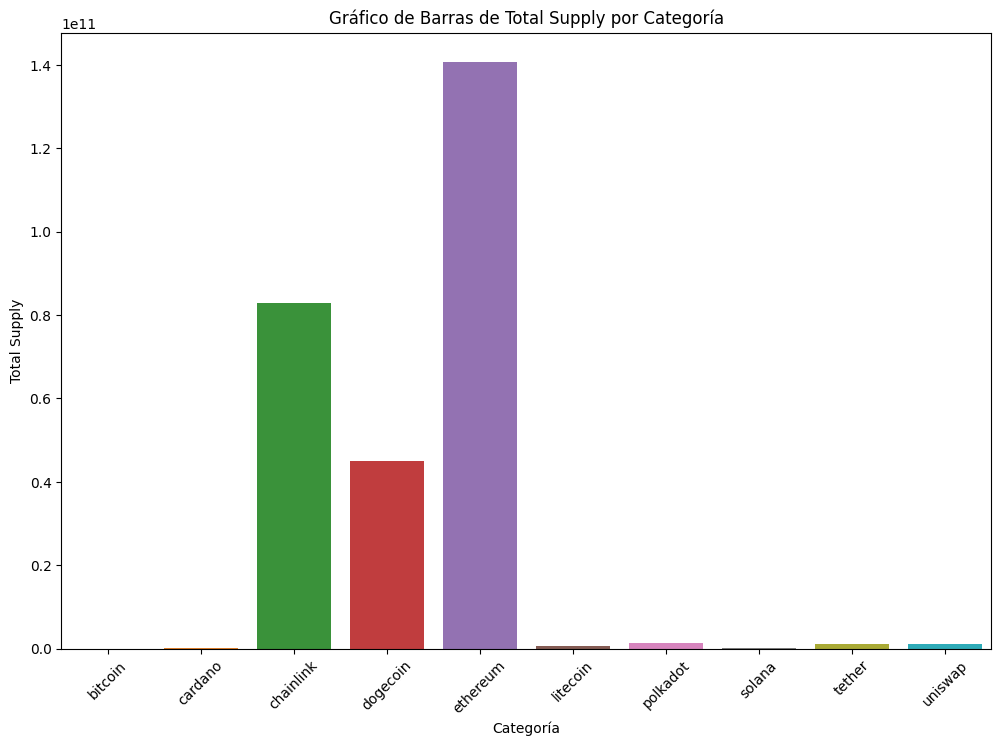

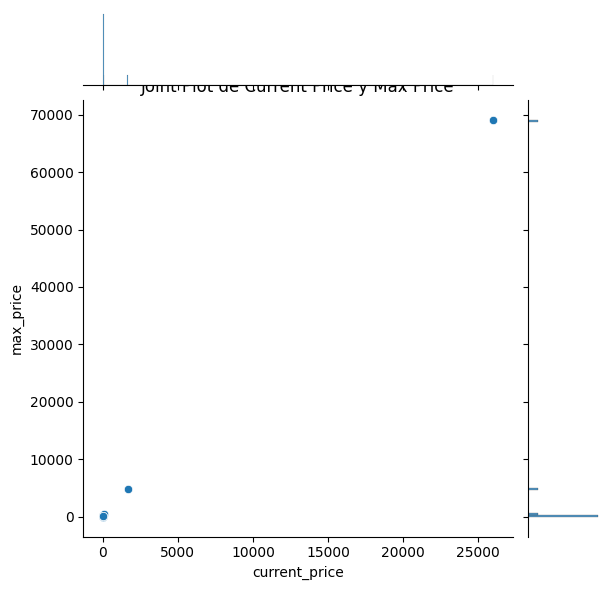

In [51]:
# Gráfico de Líneas de Min Price a lo largo del tiempo
plt.figure(figsize=(12, 6))  # Crear una figura de tamaño 12x6 pulgadas
sns.lineplot(x='id_x', y='min_price', data=data)  # Crear un gráfico de líneas de min_price a lo largo del tiempo
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x en 45 grados
plt.title('Gráfico de Líneas de Min Price a lo largo del tiempo')  # Establecer título del gráfico
plt.xlabel('Fecha o Categoría')  # Etiqueta del eje x
plt.ylabel('Min Price')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

# Box Plot de Circulating Supply por Total Supply
plt.figure(figsize=(10, 6))  # Crear una figura de tamaño 10x6 pulgadas
sns.boxplot(x='circulating_supply', y='total_supply', data=data)  # Crear un gráfico de caja (box plot) de circulating_supply por total_supply
plt.title('Box Plot de Circulating Supply por Total Supply')  # Establecer título del gráfico
plt.xlabel('Circulating Supply')  # Etiqueta del eje x
plt.ylabel('Total Supply')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

# Gráfico de Barras de Total Supply por Categoría
plt.figure(figsize=(12, 8))  # Crear una figura de tamaño 12x8 pulgadas
sns.barplot(x='id_x', y='total_supply', data=data, ci=None)  # Crear un gráfico de barras de total_supply por categoría sin intervalo de confianza
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x en 45 grados
plt.title('Gráfico de Barras de Total Supply por Categoría')  # Establecer título del gráfico
plt.xlabel('Categoría')  # Etiqueta del eje x
plt.ylabel('Total Supply')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

# Joint Plot de Current Price y Max Price
sns.jointplot(x='current_price', y='max_price', data=data, kind='scatter')  # Crear un joint plot (gráfico conjunto) de current_price y max_price en formato de dispersión
plt.title('Joint Plot de Current Price y Max Price')  # Establecer título del gráfico
plt.show()  # Mostrar el gráfico

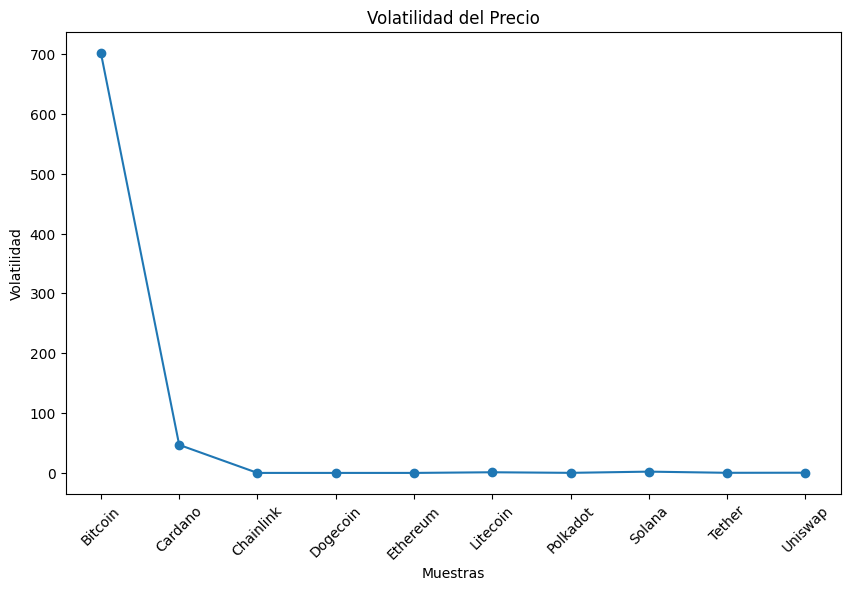

In [55]:
# Calcula la volatilidad utilizando las columnas high_24h y low_24h
data['volatilidad'] = data['high_24h'] - data['low_24h']

# Crear un gráfico de líneas de la volatilidad
plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), data['volatilidad'], marker='o')
plt.title('Volatilidad del Precio')
plt.xlabel('Muestras')
plt.ylabel('Volatilidad')
plt.xticks(range(len(data)), data['name_x'], rotation=45)  # Reemplaza con la columna adecuada
plt.show()


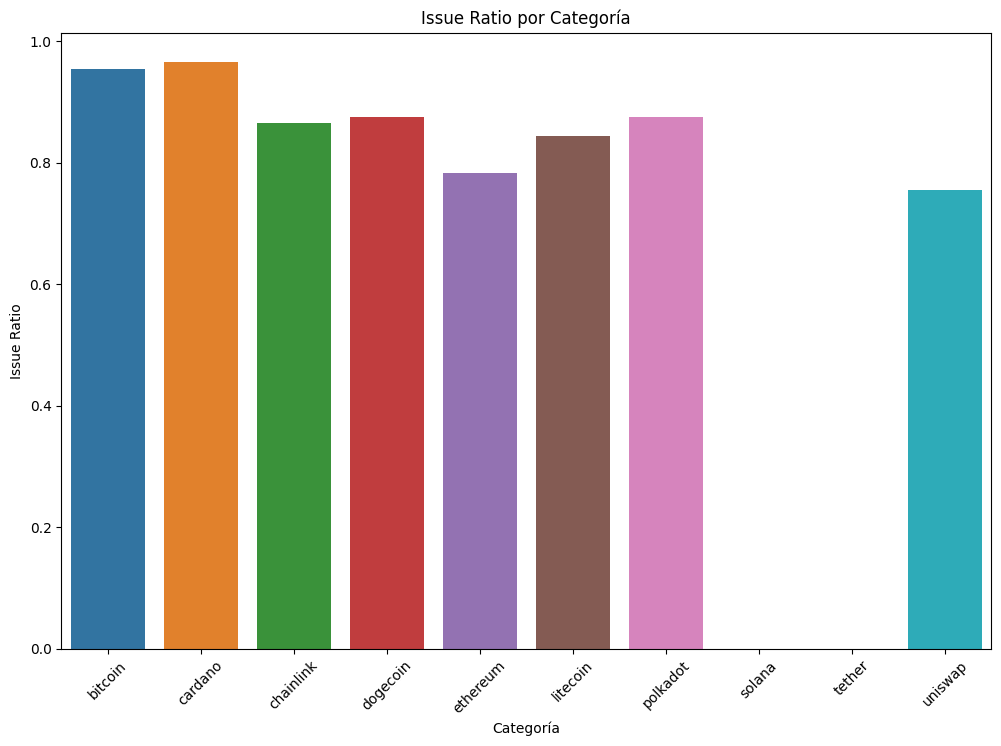

In [56]:
data['issue_ratio'] = data['closed_issues'] / data['total_issues']

# Crear un gráfico de barras del Issue Ratio por categoría
plt.figure(figsize=(12, 8))
sns.barplot(x='id_x', y='issue_ratio', data=data)
plt.xticks(rotation=45)
plt.title('Issue Ratio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Issue Ratio')
plt.show()

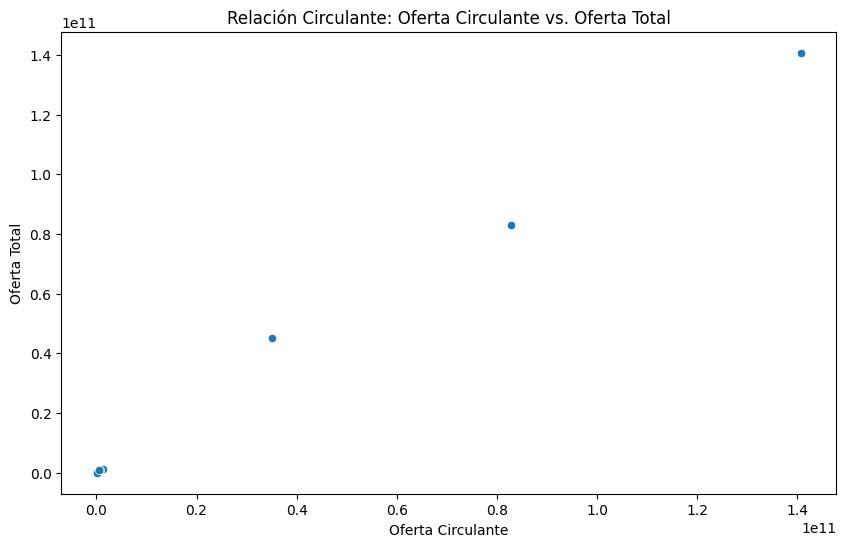

In [57]:
# Crear un scatter plot de la relación circulante
plt.figure(figsize=(10, 6))
sns.scatterplot(x='circulating_supply', y='total_supply', data=data)
plt.title('Relación Circulante: Oferta Circulante vs. Oferta Total')
plt.xlabel('Oferta Circulante')
plt.ylabel('Oferta Total')
plt.show()